# Uruchom model Bielik-4.5B-v3.0 na Colab za darmo, w ciągu kilku minut!

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

### Otwórz ten plik w colab
<a target="_blank" href="https://colab.research.google.com/github/ontaptom/wdi/blob/main/bielik-4.5b_v3.0-colab.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg">

#  Colab Runtime ze wsparciem GPU

Aby bezproblemowo uruchomić Bielika v3, zmieńmy domyślny runtime type na **T4 GPU**, możesz to zrobić w menu Runtime-> Change Runtime type, lub po prawej stronie obok przycisku Connect:


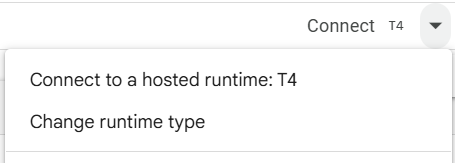

T4 GPU enabled runtime:

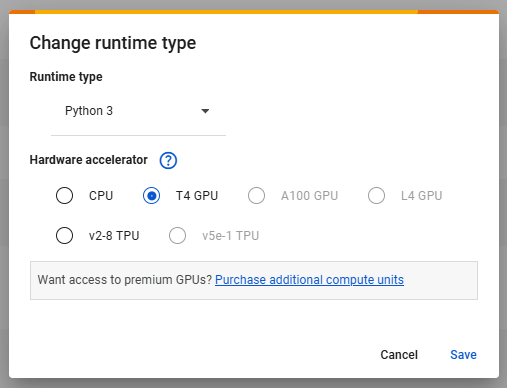

Całkowicie za darmo, jest limit godzinowy, który resetuje się następnego dnia :)

In [1]:
# @title Instalacja bibliotek
!pip install -q transformers torch accelerate sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.4 MB/s eta 0:00:00


In [2]:
# @title Import bibliotek
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

In [5]:
# @title Sprawdzenie dostępności GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Używanie urządzenia: {device}")

if device == "cpu":
    print(f'Na pewno wybrany Runtime to T4 GPU? Wybierz go w Runtime -> Change Runtime type')

Używanie urządzenia: cuda


## Wymagane działania aby pobrać model

Na dzień dzisiejszy, aby pobrać model Bielik v3 ("speakleash/Bielik-4.5B-v3.0-Instruct") potrzebujemy:

- konto na huggingface (darmowe) - https://huggingface.co/
- wygenerować token (read-token będzie OK) do autoryzacji tutaj: https://huggingface.co/settings/tokens
- najłatwiej jest w colab dodać ten token w sekretach (po lewej stronie ikonka kluczyka), ale możemy go przekazać bezpośrednio w poniższym bloku (huggingface login)
- musimy udać się na stronę modelu https://huggingface.co/speakleash/Bielik-4.5B-v3.0-Instruct oraz zaakceptować 'Terms of use' (oczywiście po przeczytaniu :) ) - przycisk **Agree and access repository**

In [3]:
# @title Huggingface login

from google.colab import userdata
from huggingface_hub import login


login(token=userdata.get('HF_TOKEN'))

print("Zalogowano do Hugging Face")

Zalogowano do Hugging Face


In [6]:
# @title Pobranie modełu i tokenizera

model_name = "speakleash/Bielik-4.5B-v3.0-Instruct"

# Ładowanie tokenizera
print("Ładowanie tokenizera...")
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Ładowanie modelu z precyzją bfloat16
print("Ładowanie modelu (to może potrwać kilka minut)...")
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    device_map="auto"
)

Ładowanie tokenizera...


tokenizer_config.json:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

Ładowanie modelu (to może potrwać kilka minut)...


config.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/78.0k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.52G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [8]:
# @title pierwszy prompt do bielika v3!

# Prosty test modelu
prompt = "Przepis na jajecznicę w dwóch zdaniach" # @param {type: "string"}
messages = [{"role": "user", "content": prompt}]
input_ids = tokenizer.apply_chat_template(messages, return_tensors="pt").to(device)
outputs = model.generate(input_ids, max_new_tokens=1000)
response = tokenizer.batch_decode(outputs)[0]
print(response)

<s><|im_start|> user
Przepis na jajecznicę w dwóch zdaniach<|im_end|> 

1. Na patelni rozgrzej masło, dodaj posiekaną cebulę i smaż, aż zmięknie.
2. Wbij jajka, dopraw solą i pieprzem, mieszaj, aż się zetną.<|im_end|>


In [9]:
# @title dodajmy funkcje pomocnicze do łatwiejszej komunikacji

import re
def zapytaj(prompt, system=""):
    """
    Prosta funkcja wysyłająca pojedyncze zapytanie do modelu i zwracająca tylko czystą odpowiedź.

    Args:
        prompt: Pytanie do modelu
        system: Opcjonalna instrukcja systemowa

    Returns:
        Tylko tekst odpowiedzi modelu
    """
    # Formatujemy prompt bezpośrednio
    if system:
        formatted_prompt = f"<s><|im_start|> system\n{system}<|im_end|>\n<|im_start|> user\n{prompt}<|im_end|>\n<|im_start|> assistant\n"
    else:
        formatted_prompt = f"<s><|im_start|> user\n{prompt}<|im_end|>\n<|im_start|> assistant\n"

    # Tokenizujemy
    inputs = tokenizer(formatted_prompt, return_tensors="pt").to(device)

    # Generujemy odpowiedź
    outputs = model.generate(inputs["input_ids"], max_new_tokens=1000)

    # Dekodujemy całą odpowiedź
    full_response = tokenizer.decode(outputs[0], skip_special_tokens=False)
    # print(f"debug full response \n{full_response} \n\n------------ end of full response")

    # Wyodrębniamy tylko odpowiedź asystenta używając wyrażenia regularnego
    match = re.search(r'<\|im_start\|\>\s+assistant\n(.*?)<\|im_end\|>', full_response, re.DOTALL)
    if match:
        clean_response = match.group(1).strip()
    else:
        clean_response = "Nie udało się wyodrębnić odpowiedzi asystenta"

    return clean_response

In [10]:

prompt = " Przepis na jajecznicę w dwóch zdaniach"# @param {type: "string"}
zapytaj(prompt)

'**Jajecznica:**\n1. Rozbij 2-3 jajka do miski, dodaj szczyptę soli i pieprzu, wymieszaj.\n2. Na patelni rozgrzej masło lub olej, wlej jajka i smaż na średnim ogniu, mieszając, aż się zetną. Podawaj z chlebem i warzywami.'

In [11]:
# @title Prosty czat

def czat_bielik():
    """
    Prosty czat z modelem Bielik, który zapamiętuje kontekst rozmowy.
    """
    print("Czat z modelem Bielik-4.5B. Wpisz 'exit' aby zakończyć.")

    # Pobieramy instrukcję systemową
    system = input("Podaj instrukcję systemową (lub Enter dla domyślnej): ")
    if not system:
        system = "Odpowiadaj krótko i precyzyjnie w języku polskim."

    # Historia rozmowy
    messages = []

    # Dodajemy instrukcję systemową
    if system:
        messages.append({"role": "system", "content": system})

    while True:
        # Pobieramy pytanie od użytkownika
        msg = input("\nPytanie: ")

        # Sprawdzamy warunek wyjścia
        if msg.lower() == 'exit':
            print("Koniec czatu.")
            break

        # Dodajemy pytanie do historii
        messages.append({"role": "user", "content": msg})

        # Przygotowujemy pełny kontekst dla zapytania
        context = ""

        # Budujemy kontekst z całej historii rozmowy
        for message in messages:
            role = message["role"]
            content = message["content"]

            if role == "system":
                context += f"<|im_start|> system\n{content}<|im_end|>\n"
            elif role == "user":
                context += f"<|im_start|> user\n{content}<|im_end|>\n"
            elif role == "assistant":
                context += f"<|im_start|> assistant\n{content}<|im_end|>\n"

        # Dodajemy początek odpowiedzi asystenta
        context += "<|im_start|> assistant\n"

        # Tokenizujemy
        inputs = tokenizer(context, return_tensors="pt").to(device)

        # Generujemy odpowiedź
        outputs = model.generate(inputs["input_ids"], max_new_tokens=500)

        # Dekodujemy całą odpowiedź
        full_response = tokenizer.decode(outputs[0], skip_special_tokens=False)

        # Wyodrębniamy tylko ostatnią odpowiedź asystenta
        import re
        match = re.search(r'<\|im_start\|\>\s+assistant\n(.*?)(?:<\|im_end\|>|$)', full_response.split(msg)[-1], re.DOTALL)

        if match:
            clean_response = match.group(1).strip()
        else:
            clean_response = "Nie udało się wyodrębnić odpowiedzi asystenta"

        # Wyświetlamy odpowiedź
        print(f"\nBielik: {clean_response}")

        # Dodajemy odpowiedź do historii
        messages.append({"role": "assistant", "content": clean_response})



In [14]:
# @title Uruchom czat (exit: zakończ)
czat_bielik()

Czat z modelem Bielik-4.5B. Wpisz 'exit' aby zakończyć.
Podaj instrukcję systemową (lub Enter dla domyślnej): stwórz podsumowanie tekstu uzytkownika, najwazniejsze informacje zawrzyj w liście punktowanej, 

Pytanie: Papieżyca Joanna (łac. Ioanna Papissa/Ioannes Anglicus; znana także jako Jutta, Mulier Jutte, Gilberta, Agnes lub Glancia, według przekazów ur. około 818 w Moguncji, zm. w 858 w Rzymie) – postać legendarna, rzekomo została papieżem w 855 pod imieniem Jan VIII[1].  Legenda Według jednej z wersji legendy mieszkająca w Moguncji Angielka wraz ze swym ukochanym wybrała się w podróż do Aten[2]. Tam, ciągle pozostając w męskim przebraniu, zataiła swoją płeć, co pozwoliło jej zdobyć rozległe wykształcenie[2]. Gdy wróciła do Rzymu pod imieniem Jan Anglicus, została kardynałem[3], a następnie głową Kościoła katolickiego jako Jan VIII[2]. W legendach okres jej pontyfikatu umiejscowiony jest pomiędzy Leonem IV a Benedyktem III (według innej wersji miała zostać papieżem po śmierci Wikto

KeyboardInterrupt: Interrupted by user